# Структура данных Series

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

**Series** – это одномерный объект, содержащий массив данных любого типа (числовые, строковые, булевы, даты и т.д.) и ассоциированный с ним массив меток, называемый индексом. Индекс генерируется автоматически (целочисленные значения: 0, 1, 2, 3 и т.д.), или же индивидуально задается пользователем (например: 'a', 'b', 'c', 'd').

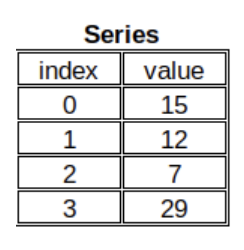

### Создание объекта Series

Создаются объекты с помощью конструктора класса *Series* , который имеет следующий синтаксис:

`pandas.Series(data=None, index=None, dtype=None, name=None, copy=False)`

- data - структура, на базе которой будет создан объект Series;
- index - список меток, который будет использоваться для доступа к элементам объекта Series.
- dtype - тип данных;
- name - имя объекта Series;
- copy - если параметр принимает значение True, то будет создана копия массива данных и на ее базе сформирован объект Series. По умолчанию False.

Создать объект Series можно разными способами:
- из списка или кортежа Python;
- из словаря;
- используя NumPy-массив;
- используя константу.

Пустой объект `Series` будет выглядеть так:

In [2]:
srs = pd.Series()
print(srs)

Series([], dtype: object)


#### Cоздание объекта Series из списка

In [3]:
lst = [50, 60, 70]
srs = pd.Series(data=lst)
print(srs)

0    50
1    60
2    70
dtype: int64


#### Создание объекта Series из словаря

Допустим у нас имеется словарь с ценами акций трех металлургических компаний:

In [4]:
shares = {'ММК': 52.50, 'Северсталь': 1386.20, 'НЛМК': 214.20}
srs = pd.Series(data=shares)
print(srs)

ММК             52.5
Северсталь    1386.2
НЛМК           214.2
dtype: float64


По итогу выполнения кода сформировался объект *Series*, в котором метками индекса являются ключи словаря, а значениями серии стали значения словаря.

А тепьте попробуем создать серию из того же словаря, но передать свои индексы:

In [5]:
srs = pd.Series(shares, index=['A', 'B', 'C'])
print(srs)

A   NaN
B   NaN
C   NaN
dtype: float64


В результате колонка индексов сформировалась согласно переданным значениям параметру `index`, а вот в столбце с данными мы видим записи `NaN`, означающие отсутствие какого-либо значения.

Логика произошедшей операции заключается в следующем: сначала сформировалась колонка с индексами, согласно значениям переданным параметру `index`. Затем значения индексов соотнеслись с ключами словаря, и если произошло совпадение ключа и метки индекса, то к данной метке индекса "привязывается" значение из словаря. Если среди ключей словаря не нашлось совпадения с меткой индекса, то данной метке индекса присваивается значение `NaN`.

Например, если передадим параметру `index` не все ключи словаря, то результат будет следующим:

In [6]:
shares = {'ММК': 52.50, 'Северсталь': 1386.20, 'НЛМК': 214.20} 
srs = pd.Series(shares, index=['ММК', 'Северсталь'])
print(srs)

ММК             52.5
Северсталь    1386.2
dtype: float64


#### Создание объекта Series из NumPy-массива

In [7]:
arr = np.array([52.50, 1386.20, 214.20])
print(arr, type(arr), sep='\n\n')

[  52.5 1386.2  214.2]

<class 'numpy.ndarray'>


In [8]:
srs = pd.Series(arr)
print(srs)

0      52.5
1    1386.2
2     214.2
dtype: float64


#### Создание объекта Series из константы

In [9]:
srs = pd.Series(170, index=['Газпром', 'Газпром', 'Газпром'])
print(srs)

Газпром    170
Газпром    170
Газпром    170
dtype: int64


### Методы, параметры и атрибуты Series

#### Метод `info()`

Одним из частоиспользуемых и полезных методов, применительно к объектам *Series* и *DataFrame*, является метод `info()`, который позволяет получить краткую информацию об этих структурах данных, такую как: 
- тип используемой индексации,
- количество и наименования столбцов (для *DataFrame*),
- наличие пропусков в данных,
- общее количество строк,
- типы используемых данных,
- объем занимаемой памяти объектом.

In [10]:
srs = pd.Series([20, 30, 40])
srs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 156.0 bytes


Здесь мы видим, что наш объект является структурой класса *Series*, содержит три записи, проиндексированные от 0 до 2. Объект не имеет названия (Series name: None). Из трех записей все три заполнены целочисленными значениями, и объем памяти, занимаемый этим объектом, составляет 156 байт.

#### Параметр `index` конструктора класса `Series`

Используя параметр `index`, можем создать свою индексацию объекта `Series`.

In [11]:
srs = pd.Series([20, 30, 40], index=['A', 'B', 'C'])

print(srs)

A    20
B    30
C    40
dtype: int64


In [12]:
srs.info()

<class 'pandas.core.series.Series'>
Index: 3 entries, A to C
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


#### Атрибут `index` объекта `Series`

Когда объект *Series* уже создан, он в своем арсенале имеет так называемые "атрибуты". Атрибуты используются для извлечения данных или любой информации, относящейся к конкретному объекту *Series*.

Атрибут `index` возвращает объект `pandas.Index`, содержащий метки индекса объекта `Series`.

In [13]:
srs = pd.Series([20, 30, 40], index=['A', 'B', 'C'])
print(srs.index)

Index(['A', 'B', 'C'], dtype='object')


Также колонке индекса можно присвоить наименование через другой атрибут, который называется name. Например, назовем колонку с индексами - `'Индекс'`:

In [14]:
srs.index.name = 'Индекс'
print(srs)

Индекс
A    20
B    30
C    40
dtype: int64


#### Атрибут `values` объекта `Series`

Атрибут `values` возвращает **массив значений** объекта `Series`.

In [15]:
display(srs.values)

array([20, 30, 40], dtype=int64)

Если, например, нужно вывести массив значений меток индекса, а не объект `pandas.Index`, то используется комбинация атрибутов `index` и `values`:

In [16]:
display(srs.index.values)

array(['A', 'B', 'C'], dtype=object)

#### Атрибут `dtype`

Еще один способ, помимо метода `info()`, узнать информацию о типе данных - применить к объекту `Series` атрибут `dtype`

In [17]:
shares = {'ММК': 52.50, 'Северсталь': 1386.20, 'НЛМК': 214.20} 
srs = pd.Series(shares)
print(srs)

ММК             52.5
Северсталь    1386.2
НЛМК           214.2
dtype: float64


In [18]:
print(srs.dtype)

float64


Получили информацию, что серия *srs* содержит данные типа `'float64'`.

#### Параметр `dtype` конструктора класса Series

`class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False)`

Параметр `dtype` конструктора класса *Series* позволяет пользователю задавать тип данных при создании серии.

Например, из словаря `shares = {'ММК': 52, 'Северсталь': 1386.20, 'НЛМК': 214.20}`, если не указывать тип данных при создании серии, сформируется объект *Series*, тип данных в котором будет `'float64'`.

Создадим `Series` c типом данных `'object'`:

In [19]:
shares = {'ММК': 52, 'Северсталь': 1386.20, 'НЛМК': 214.20} 
srs = pd.Series(shares, dtype='object')
print(srs)

ММК               52
Северсталь    1386.2
НЛМК           214.2
dtype: object


#### Функция `type()`

Функция `type()` позволяет получить информацию не о типе данных внутри объекта, а узнать к какому классу принадлежит сам объект.

In [20]:
print(type(srs))

<class 'pandas.core.series.Series'>


#### Метод astype()

В объектах `Series` возможно производить изменения типов данных, что позволяет сделать метод `astype()`. Этому методу передается тот тип данных, в который нужно преобразовать значения структуры *Series*.

In [21]:
shares = {'ММК': 52, 'Северсталь': 1386.20, 'НЛМК': 214.20} 
srs = pd.Series(shares, dtype='object')
print(srs)
srs.astype('float64')

ММК               52
Северсталь    1386.2
НЛМК           214.2
dtype: object


ММК             52.0
Северсталь    1386.2
НЛМК           214.2
dtype: float64

Видим, что вроде как тип данных поменялся на вещественный. Но в данном случае произошло создание нового объекта `Series`, а в самой серии *srs* тип данных остался прежним:

In [22]:
print(srs)

ММК               52
Северсталь    1386.2
НЛМК           214.2
dtype: object


Если необходимо, чтобы тип данных поменялся и в исходной серии, используйте оператор присваивания `'='`:

In [23]:
srs = srs.astype('float64')
print(srs)

ММК             52.0
Северсталь    1386.2
НЛМК           214.2
dtype: float64


#### Параметр `copy` конструктора класса Series

`class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False)`

Чтобы в массиве, на базе которого создается объект `Series`, не происходили изменения, когда меняются значения в серии, для этого в конструкторе `Series` предусмотрен параметр `copy`. Если этому параметру передать значение `True`, то серия создастся на копии массива, и любые последующие изменения в объекте `Series` никак не отразятся на исходном массиве.

In [24]:
arr = np.array([52.50, 1386.20, 214.20])
print(arr)

[  52.5 1386.2  214.2]


In [25]:
srs = pd.Series(arr, index=['ММК', 'Северсталь', 'НЛМК'], copy=True)
print(srs)

ММК             52.5
Северсталь    1386.2
НЛМК           214.2
dtype: float64


Поменяем значение для `'ММК'`:

In [26]:
srs['ММК'] = 50
print(srs)

ММК             50.0
Северсталь    1386.2
НЛМК           214.2
dtype: float64


Исходный массив:

In [27]:
print(arr)

[  52.5 1386.2  214.2]


#### Параметр `name` конструктора класса Series

Параметр `name` используется для создания имени у объекта `Series`.

Создадим серию *srs* из массива arr и назовем ее `'Shares'`:

In [28]:
srs = pd.Series(arr, index=['ММК', 'Северсталь', 'НЛМК'], name='Shares')
print(srs)

ММК             52.5
Северсталь    1386.2
НЛМК           214.2
Name: Shares, dtype: float64


### Типы данных

Проверка типа данных - это одно из первых действий, которое аналитик должен произвести после загрузки новых данных в *pandas* для дальнейшего анализа.

Чтобы в процессе анализа данных не получать ошибки или неожиданные результаты, нужно использовать правильные типы данных. Язык *Python* содержит такие типы данных, как: str, int, float, bool, datetime. Библиотека же *pandas* содержит свой набор типов данных для хранения и манипулирования ими.

Основные типы данных, используемые в *pandas*:
- `object` - текстовые или смешанные числовые и нечисловые значения;
- `int64` - целые числа;
- `float64` - числа с плавающей точкой;
- `bool` - булевое значение: True/False;
- `datetime64[ns]` - дата и время;
- `timedelta64[ns]` - разность двух datetime элементов;
- `category` - ограниченное множество текстовых элементов.

### Работа с конкретными значениями объекта Series

#### Обращаемся к конкретным значениям объекта Series

 Для того, чтобы получить значение конкретного элемента серии, нужно в квадратных скобках указать метку индекса этого элементаод:

In [29]:
arr = np.array([52.50, 1386.20, 214.20])
srs = pd.Series(arr)
print(srs)

0      52.5
1    1386.2
2     214.2
dtype: float64


In [30]:
print(srs[0])

52.5


Для получения значений нескольких элеменов, используются срезы:

In [31]:
print(srs[0:2])

0      52.5
1    1386.2
dtype: float64


Если объект *Series*  имеет нечисловую индексацию, то получить конкретное значение можно как и по числовой метке индекса, так и передав в квадратных скобках строку с именем метки индекса.

Создадим серию с именованными индексами:

In [32]:
arr = np.array([52.50, 1386.20, 214.20])
srs = pd.Series(arr, index=['ММК', 'Северсталь', 'НЛМК'])
print(srs)

ММК             52.5
Северсталь    1386.2
НЛМК           214.2
dtype: float64


Получим значение по метке 'НЛМК':

In [33]:
print(srs['НЛМК'])

214.2


Но если укажем числовую индексацию, то результат будет аналогичным:

In [34]:
print(srs[2])

214.2


C:\Users\ardat\AppData\Local\Temp\ipykernel_21036\1079724254.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(srs[2])


#### Меняем значение

Для изменения значений в объектах *Series* используется оператор присваивания `'='`.

In [35]:
srs['ММК'] = 50
print(srs)

ММК             50.0
Северсталь    1386.2
НЛМК           214.2
dtype: float64


Значение поменялось с 52.5 на 50.0.

Но если мы теперь посмотрим на массив *NumPy*, используя который мы создали серию srs, то увидим, что и в нём произошло изменение значения с 52.5 на 50.0

In [36]:
print(arr)

[  50.  1386.2  214.2]


#### Добавление нового элемента в структуру Series

Для того, чтобы добавить новый элемент в структуру `Series`, достаточно указать новый индекс для объекта и задать значение элементу.

In [37]:
srs = pd.Series(170, index=['Газпром', 'Газпром', 'Газпром'])
print(srs)

Газпром    170
Газпром    170
Газпром    170
dtype: int64


In [38]:
srs['Новатэк'] = 1750
print(srs)

Газпром     170
Газпром     170
Газпром     170
Новатэк    1750
dtype: int64


Пример 2:

In [39]:
srs = pd.Series(data=[20, 30, 40])
print(srs)

0    20
1    30
2    40
dtype: int64


In [40]:
srs[3] = 50
print(srs)

0    20
1    30
2    40
3    50
dtype: int64


#### Удаление элементов из структуры Series

Для удаления элементов из объекта `Series` используется метод `drop()`, которому передается список удаляемых меток.

In [41]:
print(srs)

0    20
1    30
2    40
3    50
dtype: int64


In [42]:
srs.drop([1, 2])

0    20
3    50
dtype: int64

Стоит отметить, что при использовании метода `drop()`, по умолчанию, текущая структура не изменяется, а возвращается новый объект `Series`, в котором будут отсутствовать выбранные метки.

Если вывести на печать серию *srs*, то увидим, что в ней не произошли изменения:

In [43]:
print(srs)

0    20
1    30
2    40
3    50
dtype: int64


Если нужно изменить непосредственно саму структуру `Series`, то методу `drop()` дополнительно нужно передать параметр `inplace=True`:

In [44]:
srs.drop([1, 2], inplace=True)
print(srs)

0    20
3    50
dtype: int64


#### Арифметические операции

Со структурами данных *pandas* можно поэлементно проводить операции сложения, вычитания, умножения, деления.

In [45]:
srs1 = pd.Series([1, 2, 3])
srs2 = pd.Series([10, 20, 30, 40])
print(srs1, srs2, sep='\n\n')

0    1
1    2
2    3
dtype: int64

0    10
1    20
2    30
3    40
dtype: int64


##### Сложение. Метод `add()`


Складывать объекты` Serie`s можно как с помощью оператора сложения` '+`', так и при помощи метода` add(`)+':

In [46]:
srs = srs1 + srs2
print(srs)

0    11.0
1    22.0
2    33.0
3     NaN
dtype: float64


Арифметические операции двух и более объектов `Series` происходят поэлементно по индексам. В нашем примере объекты `Series` имеют разную размерность, поэтому элемент с индексом 3 получил значение `NaN`. Это произошло из-за того, что *pandas* в одном из объектов не нашел значения с индексом 3.

Решить проблему с пропущенными значениями, при сложении структур `Series` разных размерностей, позволяет использование метода `add()`, который для подобных случаев имеет в своем составе параметр `fill_value`.

In [47]:
srs1.add(srs2)

0    11.0
1    22.0
2    33.0
3     NaN
dtype: float64

Параметру `fill_value` передается значение, которое "заполняет" пропуски, тем самым выравнивая ряды.

In [48]:
srs1.add(srs2, fill_value=0)

0    11.0
1    22.0
2    33.0
3    40.0
dtype: float64

К элементам структуры также можно добавить скалярное значение:

In [49]:
srs1 + 100

0    101
1    102
2    103
dtype: int64

In [50]:
srs1.add(100)

0    101
1    102
2    103
dtype: int64

##### Вычитание. Метод `sub()`

Вычитать один объект `Series` из другого можно как с помощью оператора вычитания `'-'`, так и с использованием метода `sub()`.

In [51]:
srs1 = pd.Series([1, 2, 3])
srs2 = pd.Series([10, 20, 30, 40])
print(srs1, srs2, sep='\n\n')

0    1
1    2
2    3
dtype: int64

0    10
1    20
2    30
3    40
dtype: int64


Вычтем серию *srs2* из *srs1*:

In [52]:
srs = srs1 - srs2
print(srs)

0    -9.0
1   -18.0
2   -27.0
3     NaN
dtype: float64


Теперь проделаем ту же самую манипуляцию с использованием метода `sub()` с параметром `fill_value=0`:

In [53]:
srs1.sub(srs2, fill_value=0)

0    -9.0
1   -18.0
2   -27.0
3   -40.0
dtype: float64

##### Умножение. `Метод mul()`

Произведение структур `Series` осуществляется или с использованием оператора умножения `'*'`, или при помощи метода `mul()`.

In [54]:
srs1 = pd.Series([1, 2, 3])
srs2 = pd.Series([10, 20, 30, 40])

In [55]:
srs = srs1 * srs2
print(srs)

0    10.0
1    40.0
2    90.0
3     NaN
dtype: float64


С использованием метода `mul()` с параметром `fill_value=1`:

In [56]:
srs1.mul(srs2, fill_value=1)

0    10.0
1    40.0
2    90.0
3    40.0
dtype: float64

Для возведения в степень используется оператор `'**'`:

In [57]:
srs1 ** 2

0    1
1    4
2    9
dtype: int64

##### Деление. Метод `div()`

Разделить один объект `Series` на другой можно или при помощи оператора деления `'/'`, или с использованием метода `div()`.

In [58]:
srs1 = pd.Series([1, 2, 3])
srs2 = pd.Series([10, 20, 30, 40])
print(srs1, srs2, sep='\n\n')

0    1
1    2
2    3
dtype: int64

0    10
1    20
2    30
3    40
dtype: int64


In [59]:
srs = srs2 / srs1
print(srs)

0    10.0
1    10.0
2    10.0
3     NaN
dtype: float64


С использованием метода `div()` и параметром `fill_value=1`:

In [60]:
srs2.div(srs1, fill_value=1)

0    10.0
1    10.0
2    10.0
3    40.0
dtype: float64

##### Абсолютное значение. Метод `abs()`

Метод `abs()` возвращает объект Series с абсолютными значениями (взятыми по модулю).

In [61]:
srs = pd.Series([-16, -9, 35, 77, -30])
print(srs)

0   -16
1    -9
2    35
3    77
4   -30
dtype: int64


In [62]:
srs.abs()

0    16
1     9
2    35
3    77
4    30
dtype: int64

##### Округление значений. Метод `round()`

Метод `round()` позволяет округлять значения в структурах `Series`. Параметру `decimals` этого метода передается целое число - количество знаков после запятой.s:

In [63]:
srs = pd.Series([1.28, 2.15, 3.648])
print(srs)

0    1.280
1    2.150
2    3.648
dtype: float64


In [64]:
srs.round(decimals=2)

0    1.28
1    2.15
2    3.65
dtype: float64

Имя параметра `decimals` можно не указывать, а только прописать чиленное значение:

In [65]:
srs.round(1)

0    1.3
1    2.2
2    3.6
dtype: float64